In [6]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-1.15.0


Installing TensorFlow 2.0.0.

In [7]:
!pip install tensorflow===2.0.0

     |████████████████████████████████| 86.3MB 42kB/s 
     |████████████████████████████████| 3.8MB 44.3MB/s 
     |████████████████████████████████| 450kB 43.2MB/s 
     |████████████████████████████████| 81kB 12.9MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


Check TensorFolow Version:

In [49]:
import tensorflow as tf
print(tf.__version__)

2.0.0


Now the next step is to load MNIST dataset and then prepare it. As a part of data preparation process integers from the sample data set has to be converted to floating-point numbers. Here is the code:

In [0]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(x_train, labels_train), (x_test, labels_test) = mnist.load_data()

x_train, x_test = x_train/225.0, x_test/255.0

Variables to hold image categories:

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Check shape of the image:

In [52]:
print(x_train[0].shape)

(28, 28)


Print Image:

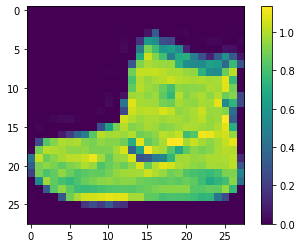

In [53]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Images categories:

Print some of the images with category name:

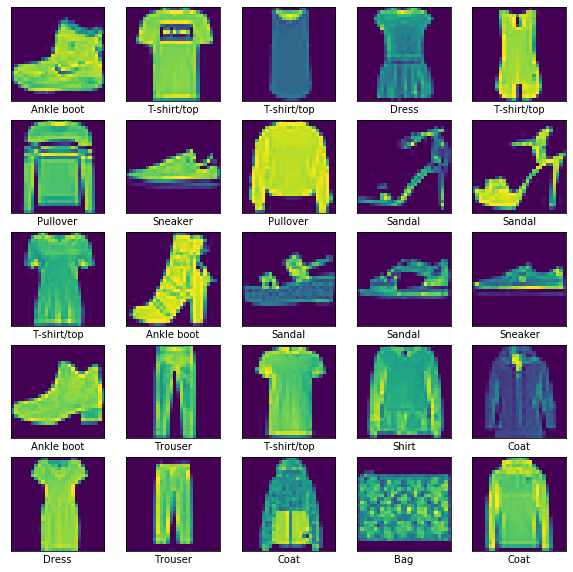

In [54]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[labels_train[i]])
plt.show()

If you want to show the grey image use following code:

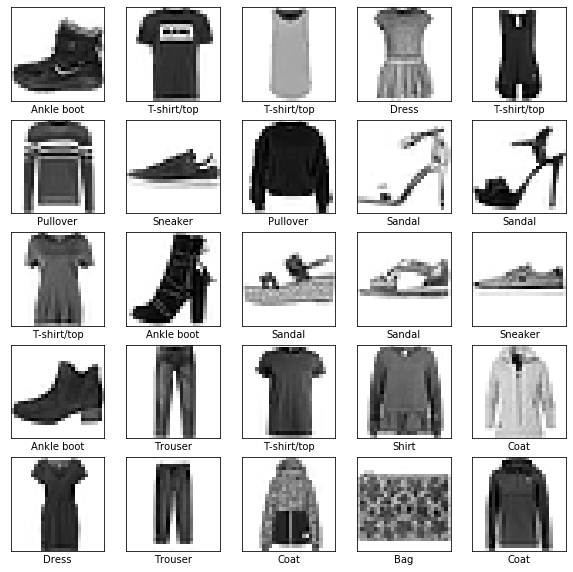

In [55]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels_train[i]])
plt.show()

Now we will create model with following code:


In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


Here is the code to display model summary:

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Now we will compile our model with following code:

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Finally run the training with following code:

In [26]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.5216 - accuracy: 0.8150
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3986 - accuracy: 0.8568
Epoch 3/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3644 - accuracy: 0.8666
Epoch 4/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3411 - accuracy: 0.8745
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3307 - accuracy: 0.8785


Now let's evaluate our model with following code:

In [27]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.34731160222291946, 0.8731]

Run the predictions on the test data with following code:

In [0]:
predictions = model.predict(x_test)

Print the pridiction result:


In [34]:
print(predictions[3])

[3.6243016e-08 9.9999928e-01 3.7957784e-09 7.3937758e-07 6.4756449e-09
 5.7308517e-15 1.9369715e-09 4.4912334e-16 1.8912003e-12 5.5952146e-15]


Print

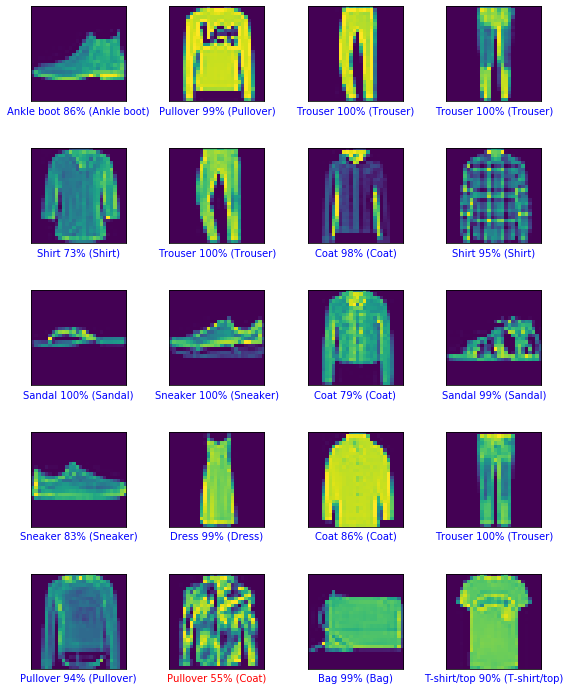

In [47]:
import numpy as np

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

#print the images
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions[i], labels_test, x_test)
plt.tight_layout()
plt.show()
